In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np

In [2]:
step_pattern = r"step:([0-9]+)/3125"
val_loss_pattern = r"val_loss:([0-9.]+)"
train_time_pattern = f"train_time:([0-9]+)ms"

In [3]:
filenames = [
    "dd7304a6-cc43-4d5e-adb8-c070111464a1.txt",
    "b5329e17-61ba-479c-80cb-098ea2c2671d.txt",
    "6c9d875b-ad91-46c9-9ede-2c7f998b9b16.txt",
]

In [4]:
files = [open(filename, "r").readlines() for filename in filenames]

In [5]:
NUM_DEVICES = 8
BATCH_PER_DEVICE = 64
SEQ_LEN = 1024

steps = np.array(list(range(0, 3250, 125)) + [3200])
tokens = NUM_DEVICES * BATCH_PER_DEVICE * SEQ_LEN * steps

In [6]:
val_losses = [[] for _ in range(len(files))]
train_times = [[] for _ in range(len(files))]
for idx, file in enumerate(files):
    for line in file:
        if line.startswith("step:") and "val_loss:" in line:
            val_loss = re.search(val_loss_pattern, line).group(1)
            train_time = re.search(train_time_pattern, line).group(1)
            val_losses[idx].append(float(val_loss))
            train_times[idx].append(float(train_time))
    val_losses[idx] = np.array(val_losses[idx])
    train_times[idx] = np.array(train_times[idx])

In [7]:
step_avg = [
    train_times[0][-1] / steps[-1],
    train_times[1][-1] / steps[-1],
    train_times[2][-1] / steps[-2],
]

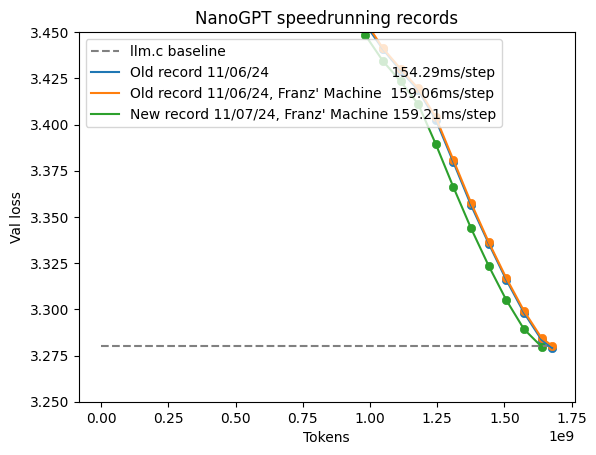

In [8]:
plt.plot(tokens, [3.28]*len(tokens), linestyle="--", color="gray", label="llm.c baseline")
plt.scatter(tokens, val_losses[0], linewidths=0.5)
plt.plot(tokens, val_losses[0],      label=f"Old record 11/06/24                            {step_avg[0]:.2f}ms/step")
plt.scatter(tokens, val_losses[1], linewidths=0.5)
plt.plot(tokens, val_losses[1],      label=f"Old record 11/06/24, Franz' Machine  {step_avg[1]:.2f}ms/step")
plt.scatter(tokens[:-1], val_losses[2], linewidths=0.5)
plt.plot(tokens[:-1], val_losses[2], label=f"New record 11/07/24, Franz' Machine {step_avg[2]:.2f}ms/step")

plt.title("NanoGPT speedrunning records")
plt.legend(loc="upper left")
plt.ylim(3.25, 3.45)
plt.ylabel("Val loss")
plt.xlabel("Tokens")
plt.savefig("nanogpt_speedrun.png")

In [9]:
train_times_min = [[], [], []]
train_times_min[0] = train_times[0] / 1000 / 60
train_times_min[1] = train_times[1] / 1000 / 60
train_times_min[2] = train_times[2] / 1000 / 60

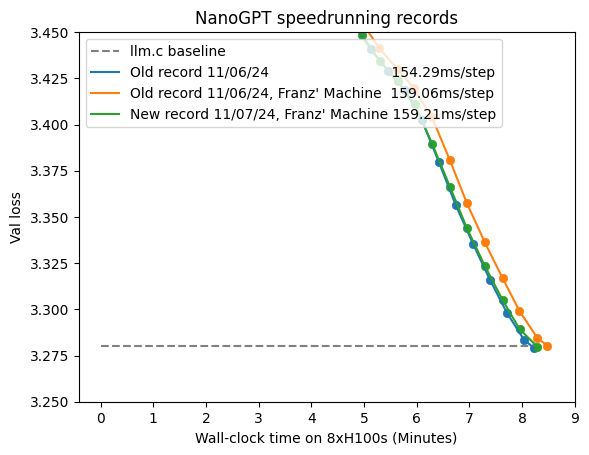

In [10]:
plt.plot(train_times_min[0], [3.28]*len(train_times_min[0]), linestyle="--", color="gray", label="llm.c baseline")
plt.scatter(train_times_min[0], val_losses[0], linewidths=0.5)
plt.plot(train_times_min[0], val_losses[0], label=f"Old record 11/06/24                            {step_avg[0]:.2f}ms/step")
plt.scatter(train_times_min[1], val_losses[1], linewidths=0.5)
plt.plot(train_times_min[1], val_losses[1], label=f"Old record 11/06/24, Franz' Machine  {step_avg[1]:.2f}ms/step")
plt.scatter(train_times_min[2], val_losses[2], linewidths=0.5)
plt.plot(train_times_min[2], val_losses[2], label=f"New record 11/07/24, Franz' Machine {step_avg[2]:.2f}ms/step")

plt.title("NanoGPT speedrunning records")
plt.legend(loc="upper left")
plt.ylim(3.25, 3.45)
plt.xticks(np.arange(10))
plt.ylabel("Val loss")
plt.xlabel("Wall-clock time on 8xH100s (Minutes)")
plt.savefig("nanogpt_speedrun_wallclock.png")